# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

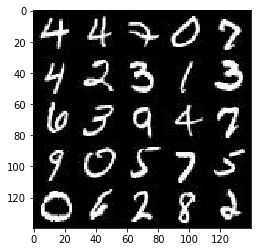

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

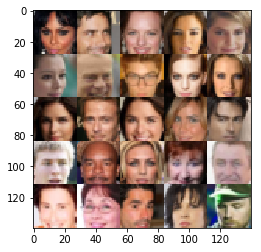

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
   
    real_input_images = tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name='real_data')
    z_data = tf.placeholder(tf.float32,(None,z_dim),name='z_data')
    lr = tf.placeholder(tf.float32,name='learning_rate')
    return real_input_images,z_data,lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [246]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    dropout =0.6
    with tf.variable_scope('discriminator', reuse=reuse):
        # Input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 32, 4, strides=2, padding='same')
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1,dropout)
        #print('x1',x1)
        # 16x16x64
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2,dropout)
        #print('x2',x2)
        # 8x8x128
        
        x3 = tf.layers.conv2d(x2, 256, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3,dropout)
        #print('x3',x3)
        # 4x4x256
        x4 = tf.layers.conv2d(x3, 512, 4, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=True)
        x4 = tf.maximum(alpha * x4, x4)
        #x4 = tf.nn.dropout(x4,dropout)
        #print('x4',x4)
        # Flatten it
        flat = tf.reshape(x4, (-1, 2*2*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [242]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    dropout = 0.5
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, 2*2*512)
        # Reshape it to start the convolutional stack
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.reshape(x1, (-1, 2, 2, 512)) 
        x1 = tf.nn.dropout(x1,dropout)
        # 3x3x512 now
        #print('x1',x1)
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2,dropout)
        # 7x7x256 now
        #print('x2',x2)
        x3 = tf.layers.conv2d_transpose(x2, 128, 4, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3,dropout)
        # 14x14x128 now
        #print('x3',x3)
        x4 = tf.layers.conv2d_transpose(x3, 32, 4, strides=2, padding='same')
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)
        #print('x4',x4)
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, out_channel_dim, 4, strides=1, padding='same')
        # 28x28x3 now
        #print('logits',logits)
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [232]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [233]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
     # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [234]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [247]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    #tf.reset_default_graph()
    #print(data_shape)
    real_data,z_data,lr = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss,g_loss = model_loss(real_data, z_data, data_shape[3])
    d_train_opt,g_train_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    steps = 0
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images= batch_images*2
                # TODO: Train Model
                #print(batch_images)
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(d_train_opt, feed_dict={real_data: batch_images, z_data: batch_z})
                _ = sess.run(g_train_opt, feed_dict={z_data: batch_z, real_data: batch_images})
                _ = sess.run(g_train_opt, feed_dict={z_data: batch_z, real_data: batch_images})
                if steps % 10 == 0:
                    train_loss_d = d_loss.eval({z_data: batch_z, real_data: batch_images})
                    train_loss_g = g_loss.eval({z_data: batch_z})
        
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
        
                    if steps % 100 == 0:
                        show_generator_output(sess,9,z_data,data_shape[3],data_image_mode)
        
        

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 2.1880... Generator Loss: 0.4161
Epoch 1/2... Discriminator Loss: 0.6012... Generator Loss: 1.3631
Epoch 1/2... Discriminator Loss: 2.3592... Generator Loss: 0.9834
Epoch 1/2... Discriminator Loss: 0.8823... Generator Loss: 1.5808
Epoch 1/2... Discriminator Loss: 0.5929... Generator Loss: 3.2745
Epoch 1/2... Discriminator Loss: 1.3501... Generator Loss: 0.8083
Epoch 1/2... Discriminator Loss: 1.4759... Generator Loss: 0.7002
Epoch 1/2... Discriminator Loss: 0.8987... Generator Loss: 0.8881
Epoch 1/2... Discriminator Loss: 1.8834... Generator Loss: 0.3457
Epoch 1/2... Discriminator Loss: 1.1655... Generator Loss: 0.7470


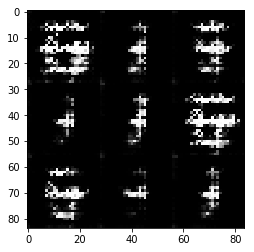

Epoch 1/2... Discriminator Loss: 1.3546... Generator Loss: 0.6392
Epoch 1/2... Discriminator Loss: 1.2592... Generator Loss: 0.7528
Epoch 1/2... Discriminator Loss: 1.2754... Generator Loss: 1.9047
Epoch 1/2... Discriminator Loss: 1.0708... Generator Loss: 1.4453
Epoch 1/2... Discriminator Loss: 1.1178... Generator Loss: 1.1630
Epoch 1/2... Discriminator Loss: 1.3892... Generator Loss: 0.6080
Epoch 1/2... Discriminator Loss: 1.2689... Generator Loss: 0.7945
Epoch 1/2... Discriminator Loss: 1.2183... Generator Loss: 0.8020
Epoch 1/2... Discriminator Loss: 1.4591... Generator Loss: 0.8365
Epoch 1/2... Discriminator Loss: 1.6725... Generator Loss: 0.7743


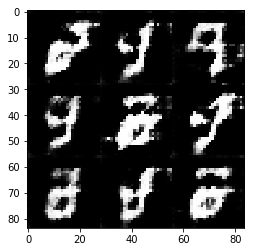

Epoch 1/2... Discriminator Loss: 1.3245... Generator Loss: 0.7693
Epoch 1/2... Discriminator Loss: 1.3917... Generator Loss: 0.7056
Epoch 1/2... Discriminator Loss: 1.3720... Generator Loss: 0.6175
Epoch 1/2... Discriminator Loss: 1.4680... Generator Loss: 0.7675
Epoch 1/2... Discriminator Loss: 1.3710... Generator Loss: 0.7223
Epoch 1/2... Discriminator Loss: 1.4627... Generator Loss: 0.8947
Epoch 1/2... Discriminator Loss: 1.3586... Generator Loss: 0.8518
Epoch 1/2... Discriminator Loss: 1.4988... Generator Loss: 0.5323
Epoch 1/2... Discriminator Loss: 1.3591... Generator Loss: 0.6934
Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.8431


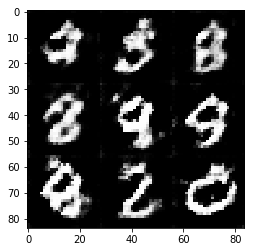

Epoch 1/2... Discriminator Loss: 1.2592... Generator Loss: 0.8117
Epoch 1/2... Discriminator Loss: 1.2807... Generator Loss: 0.6938
Epoch 1/2... Discriminator Loss: 1.5264... Generator Loss: 0.5627
Epoch 1/2... Discriminator Loss: 1.2648... Generator Loss: 0.8874
Epoch 1/2... Discriminator Loss: 1.2735... Generator Loss: 0.8882
Epoch 1/2... Discriminator Loss: 1.2115... Generator Loss: 0.9361
Epoch 1/2... Discriminator Loss: 1.5840... Generator Loss: 0.4180
Epoch 1/2... Discriminator Loss: 1.3844... Generator Loss: 0.9610
Epoch 1/2... Discriminator Loss: 1.3623... Generator Loss: 0.6147
Epoch 1/2... Discriminator Loss: 1.2602... Generator Loss: 0.6362


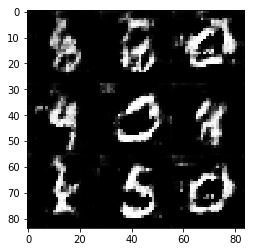

Epoch 1/2... Discriminator Loss: 1.4775... Generator Loss: 0.9905
Epoch 1/2... Discriminator Loss: 1.2574... Generator Loss: 0.7890
Epoch 1/2... Discriminator Loss: 1.2596... Generator Loss: 0.7269
Epoch 1/2... Discriminator Loss: 1.3906... Generator Loss: 0.5365
Epoch 1/2... Discriminator Loss: 1.2840... Generator Loss: 0.6845
Epoch 1/2... Discriminator Loss: 1.2943... Generator Loss: 0.7198
Epoch 2/2... Discriminator Loss: 1.2360... Generator Loss: 0.6224
Epoch 2/2... Discriminator Loss: 1.2795... Generator Loss: 0.7143
Epoch 2/2... Discriminator Loss: 1.2627... Generator Loss: 0.5489
Epoch 2/2... Discriminator Loss: 1.3024... Generator Loss: 0.6883


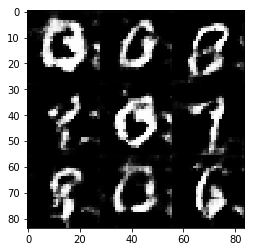

Epoch 2/2... Discriminator Loss: 1.2098... Generator Loss: 0.9014
Epoch 2/2... Discriminator Loss: 1.2537... Generator Loss: 0.9047
Epoch 2/2... Discriminator Loss: 1.2806... Generator Loss: 0.6963
Epoch 2/2... Discriminator Loss: 1.3610... Generator Loss: 0.6324
Epoch 2/2... Discriminator Loss: 1.1945... Generator Loss: 1.0291
Epoch 2/2... Discriminator Loss: 1.5990... Generator Loss: 1.0873
Epoch 2/2... Discriminator Loss: 1.3504... Generator Loss: 0.5831
Epoch 2/2... Discriminator Loss: 1.2777... Generator Loss: 0.7991
Epoch 2/2... Discriminator Loss: 1.3229... Generator Loss: 1.1466
Epoch 2/2... Discriminator Loss: 1.2909... Generator Loss: 0.9715


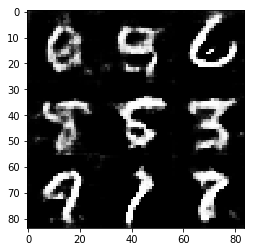

Epoch 2/2... Discriminator Loss: 1.3614... Generator Loss: 1.3695
Epoch 2/2... Discriminator Loss: 1.2193... Generator Loss: 1.0494
Epoch 2/2... Discriminator Loss: 1.2434... Generator Loss: 0.5071
Epoch 2/2... Discriminator Loss: 1.2382... Generator Loss: 1.0456
Epoch 2/2... Discriminator Loss: 1.2161... Generator Loss: 0.9660
Epoch 2/2... Discriminator Loss: 1.3597... Generator Loss: 0.4360
Epoch 2/2... Discriminator Loss: 1.3047... Generator Loss: 0.8280
Epoch 2/2... Discriminator Loss: 1.1971... Generator Loss: 0.5921
Epoch 2/2... Discriminator Loss: 1.1031... Generator Loss: 0.9894
Epoch 2/2... Discriminator Loss: 1.0288... Generator Loss: 0.9152


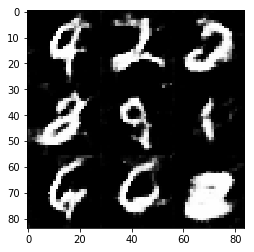

Epoch 2/2... Discriminator Loss: 1.1807... Generator Loss: 0.6979
Epoch 2/2... Discriminator Loss: 1.0687... Generator Loss: 1.1432
Epoch 2/2... Discriminator Loss: 1.2236... Generator Loss: 0.4558
Epoch 2/2... Discriminator Loss: 1.0766... Generator Loss: 0.9146
Epoch 2/2... Discriminator Loss: 1.3522... Generator Loss: 0.6133
Epoch 2/2... Discriminator Loss: 1.2277... Generator Loss: 1.0164
Epoch 2/2... Discriminator Loss: 1.2565... Generator Loss: 0.5266
Epoch 2/2... Discriminator Loss: 1.1082... Generator Loss: 0.8771
Epoch 2/2... Discriminator Loss: 1.1617... Generator Loss: 0.5855
Epoch 2/2... Discriminator Loss: 1.0190... Generator Loss: 1.2035


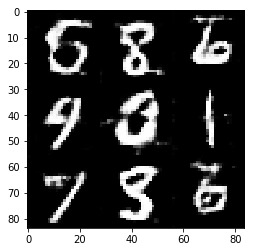

Epoch 2/2... Discriminator Loss: 1.4537... Generator Loss: 0.4267
Epoch 2/2... Discriminator Loss: 1.0370... Generator Loss: 0.6542
Epoch 2/2... Discriminator Loss: 1.1466... Generator Loss: 0.7310
Epoch 2/2... Discriminator Loss: 1.0102... Generator Loss: 1.5890
Epoch 2/2... Discriminator Loss: 1.0525... Generator Loss: 0.6538
Epoch 2/2... Discriminator Loss: 0.9750... Generator Loss: 1.2051
Epoch 2/2... Discriminator Loss: 1.1770... Generator Loss: 0.5749
Epoch 2/2... Discriminator Loss: 1.0405... Generator Loss: 1.0328
Epoch 2/2... Discriminator Loss: 1.6007... Generator Loss: 1.8793
Epoch 2/2... Discriminator Loss: 1.0359... Generator Loss: 0.9453


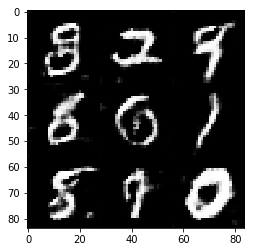

Epoch 2/2... Discriminator Loss: 1.1850... Generator Loss: 0.8102
Epoch 2/2... Discriminator Loss: 0.8720... Generator Loss: 0.9197
Epoch 2/2... Discriminator Loss: 1.0812... Generator Loss: 0.8786


In [248]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5
tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.4549... Generator Loss: 2.2071
Epoch 1/1... Discriminator Loss: 1.1376... Generator Loss: 1.2364
Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 0.8071
Epoch 1/1... Discriminator Loss: 1.2939... Generator Loss: 0.8915
Epoch 1/1... Discriminator Loss: 1.4122... Generator Loss: 2.8312
Epoch 1/1... Discriminator Loss: 1.3597... Generator Loss: 0.9872
Epoch 1/1... Discriminator Loss: 1.4408... Generator Loss: 0.7226
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.7168
Epoch 1/1... Discriminator Loss: 1.5379... Generator Loss: 0.5598
Epoch 1/1... Discriminator Loss: 1.3948... Generator Loss: 0.9255


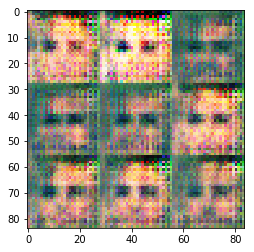

Epoch 1/1... Discriminator Loss: 1.3390... Generator Loss: 0.8865
Epoch 1/1... Discriminator Loss: 1.3128... Generator Loss: 0.9220
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 0.8077
Epoch 1/1... Discriminator Loss: 1.3783... Generator Loss: 0.9328
Epoch 1/1... Discriminator Loss: 1.6181... Generator Loss: 0.5959
Epoch 1/1... Discriminator Loss: 1.2296... Generator Loss: 0.8558
Epoch 1/1... Discriminator Loss: 1.6207... Generator Loss: 0.8517
Epoch 1/1... Discriminator Loss: 1.3466... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.3662... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.2988... Generator Loss: 1.0027


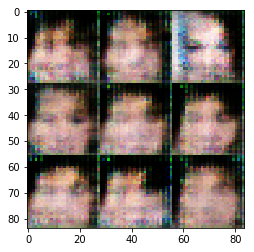

Epoch 1/1... Discriminator Loss: 1.4293... Generator Loss: 0.6351
Epoch 1/1... Discriminator Loss: 1.3104... Generator Loss: 0.6123
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.4415... Generator Loss: 0.6801
Epoch 1/1... Discriminator Loss: 1.4262... Generator Loss: 0.7481
Epoch 1/1... Discriminator Loss: 1.4331... Generator Loss: 0.6784
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.5908
Epoch 1/1... Discriminator Loss: 1.4232... Generator Loss: 0.6137
Epoch 1/1... Discriminator Loss: 1.6411... Generator Loss: 0.5149
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 0.7652


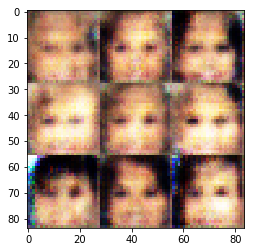

Epoch 1/1... Discriminator Loss: 1.4809... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.4162... Generator Loss: 0.6623
Epoch 1/1... Discriminator Loss: 1.3961... Generator Loss: 0.7051
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.6366
Epoch 1/1... Discriminator Loss: 1.4302... Generator Loss: 0.7820
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 1.4138... Generator Loss: 0.8102
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.2875... Generator Loss: 0.7205
Epoch 1/1... Discriminator Loss: 1.2332... Generator Loss: 0.7928


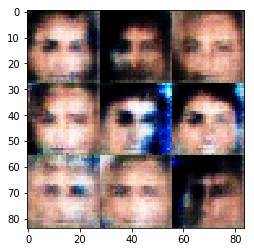

Epoch 1/1... Discriminator Loss: 1.3352... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.2472... Generator Loss: 0.7888
Epoch 1/1... Discriminator Loss: 1.3059... Generator Loss: 0.6635
Epoch 1/1... Discriminator Loss: 1.4692... Generator Loss: 0.5922
Epoch 1/1... Discriminator Loss: 1.3617... Generator Loss: 0.6655
Epoch 1/1... Discriminator Loss: 1.1874... Generator Loss: 0.9500
Epoch 1/1... Discriminator Loss: 1.2639... Generator Loss: 0.7937
Epoch 1/1... Discriminator Loss: 1.5289... Generator Loss: 0.5852
Epoch 1/1... Discriminator Loss: 1.4340... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.2852... Generator Loss: 0.6525


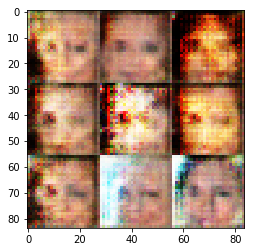

Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 0.8666
Epoch 1/1... Discriminator Loss: 1.4261... Generator Loss: 0.6947
Epoch 1/1... Discriminator Loss: 1.5029... Generator Loss: 0.5541
Epoch 1/1... Discriminator Loss: 1.2895... Generator Loss: 0.8679
Epoch 1/1... Discriminator Loss: 1.3307... Generator Loss: 0.6282
Epoch 1/1... Discriminator Loss: 1.3741... Generator Loss: 0.8456
Epoch 1/1... Discriminator Loss: 1.2073... Generator Loss: 0.7083
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.9129
Epoch 1/1... Discriminator Loss: 1.3212... Generator Loss: 0.7232
Epoch 1/1... Discriminator Loss: 1.2821... Generator Loss: 0.8232


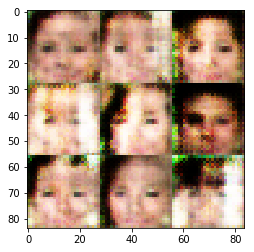

Epoch 1/1... Discriminator Loss: 1.4534... Generator Loss: 0.7051
Epoch 1/1... Discriminator Loss: 1.3813... Generator Loss: 0.6799
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.9430
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 1.4460... Generator Loss: 0.6586
Epoch 1/1... Discriminator Loss: 1.4053... Generator Loss: 0.6565
Epoch 1/1... Discriminator Loss: 1.2767... Generator Loss: 0.6982
Epoch 1/1... Discriminator Loss: 1.4883... Generator Loss: 0.6424
Epoch 1/1... Discriminator Loss: 1.4351... Generator Loss: 0.6934
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.7554


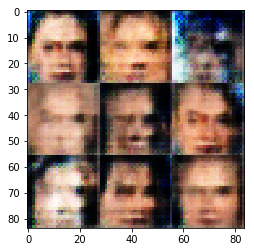

Epoch 1/1... Discriminator Loss: 1.3032... Generator Loss: 0.6179
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 0.7979
Epoch 1/1... Discriminator Loss: 1.4864... Generator Loss: 0.6291
Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.7852
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.6832
Epoch 1/1... Discriminator Loss: 1.5086... Generator Loss: 0.6300
Epoch 1/1... Discriminator Loss: 1.3272... Generator Loss: 0.7779
Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 0.7466
Epoch 1/1... Discriminator Loss: 1.4298... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.6648


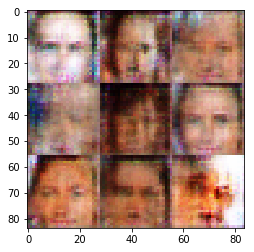

Epoch 1/1... Discriminator Loss: 1.3854... Generator Loss: 0.7506
Epoch 1/1... Discriminator Loss: 1.3980... Generator Loss: 0.6825
Epoch 1/1... Discriminator Loss: 1.3499... Generator Loss: 0.7050
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.6713
Epoch 1/1... Discriminator Loss: 1.4108... Generator Loss: 0.6365
Epoch 1/1... Discriminator Loss: 1.4473... Generator Loss: 0.7099
Epoch 1/1... Discriminator Loss: 1.6989... Generator Loss: 0.5937
Epoch 1/1... Discriminator Loss: 1.3552... Generator Loss: 0.7554
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 0.7460
Epoch 1/1... Discriminator Loss: 1.3656... Generator Loss: 0.8377


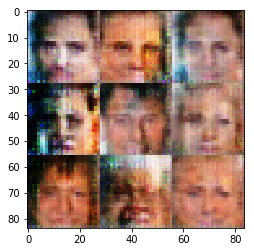

Epoch 1/1... Discriminator Loss: 1.3910... Generator Loss: 0.6225
Epoch 1/1... Discriminator Loss: 1.2586... Generator Loss: 0.8282
Epoch 1/1... Discriminator Loss: 1.3820... Generator Loss: 0.6856
Epoch 1/1... Discriminator Loss: 1.2790... Generator Loss: 0.7167
Epoch 1/1... Discriminator Loss: 1.2229... Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 1.2421... Generator Loss: 0.7264
Epoch 1/1... Discriminator Loss: 1.4139... Generator Loss: 0.7692
Epoch 1/1... Discriminator Loss: 1.2275... Generator Loss: 0.8004
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.6717
Epoch 1/1... Discriminator Loss: 1.3346... Generator Loss: 0.7502


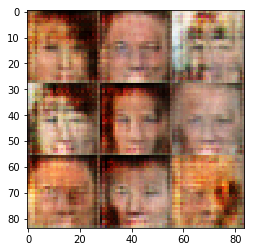

Epoch 1/1... Discriminator Loss: 1.3324... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.7637
Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.2506... Generator Loss: 0.8674
Epoch 1/1... Discriminator Loss: 1.2957... Generator Loss: 0.7595
Epoch 1/1... Discriminator Loss: 1.3006... Generator Loss: 0.8691
Epoch 1/1... Discriminator Loss: 1.3213... Generator Loss: 0.7546
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.7759
Epoch 1/1... Discriminator Loss: 1.3494... Generator Loss: 0.6367
Epoch 1/1... Discriminator Loss: 1.3130... Generator Loss: 0.6976


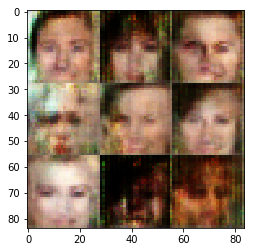

Epoch 1/1... Discriminator Loss: 1.2844... Generator Loss: 0.6762
Epoch 1/1... Discriminator Loss: 1.3240... Generator Loss: 0.8170
Epoch 1/1... Discriminator Loss: 1.4541... Generator Loss: 0.5888
Epoch 1/1... Discriminator Loss: 1.3736... Generator Loss: 0.7535
Epoch 1/1... Discriminator Loss: 1.4136... Generator Loss: 0.7102
Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.8275
Epoch 1/1... Discriminator Loss: 1.2418... Generator Loss: 0.6572
Epoch 1/1... Discriminator Loss: 1.4252... Generator Loss: 0.9727
Epoch 1/1... Discriminator Loss: 1.1785... Generator Loss: 0.7887
Epoch 1/1... Discriminator Loss: 1.2617... Generator Loss: 0.7855


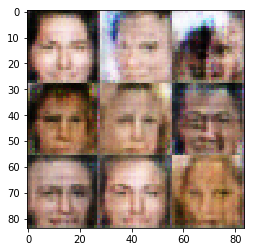

Epoch 1/1... Discriminator Loss: 1.4309... Generator Loss: 0.7237
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.8379
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.7262
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.7668
Epoch 1/1... Discriminator Loss: 1.3284... Generator Loss: 0.7165
Epoch 1/1... Discriminator Loss: 1.3141... Generator Loss: 0.7825
Epoch 1/1... Discriminator Loss: 1.3462... Generator Loss: 0.7693
Epoch 1/1... Discriminator Loss: 1.5794... Generator Loss: 1.0347
Epoch 1/1... Discriminator Loss: 1.3734... Generator Loss: 0.7556
Epoch 1/1... Discriminator Loss: 1.3477... Generator Loss: 0.7167


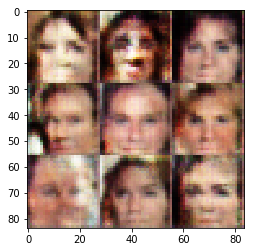

Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.7601
Epoch 1/1... Discriminator Loss: 1.2993... Generator Loss: 0.7998
Epoch 1/1... Discriminator Loss: 1.4210... Generator Loss: 0.6328
Epoch 1/1... Discriminator Loss: 1.3643... Generator Loss: 0.6506
Epoch 1/1... Discriminator Loss: 1.3280... Generator Loss: 0.8126
Epoch 1/1... Discriminator Loss: 1.3060... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.3165... Generator Loss: 0.6354
Epoch 1/1... Discriminator Loss: 1.4103... Generator Loss: 0.8561
Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 0.8468
Epoch 1/1... Discriminator Loss: 1.3998... Generator Loss: 0.6582


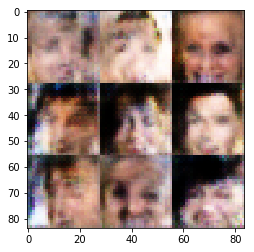

Epoch 1/1... Discriminator Loss: 1.3912... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.4112... Generator Loss: 0.8019
Epoch 1/1... Discriminator Loss: 1.3138... Generator Loss: 0.6178
Epoch 1/1... Discriminator Loss: 1.2757... Generator Loss: 0.8888
Epoch 1/1... Discriminator Loss: 1.1960... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 1.3661... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.3996... Generator Loss: 0.6450
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.7191
Epoch 1/1... Discriminator Loss: 1.3746... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.3358... Generator Loss: 0.6780


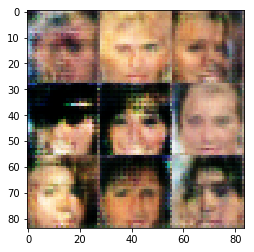

Epoch 1/1... Discriminator Loss: 1.2814... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.4209... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.2807... Generator Loss: 0.8064
Epoch 1/1... Discriminator Loss: 1.3041... Generator Loss: 0.6295
Epoch 1/1... Discriminator Loss: 1.3831... Generator Loss: 0.6611
Epoch 1/1... Discriminator Loss: 1.4266... Generator Loss: 0.7519
Epoch 1/1... Discriminator Loss: 1.3345... Generator Loss: 0.5825
Epoch 1/1... Discriminator Loss: 1.3631... Generator Loss: 0.9079


In [249]:
batch_size = 128
z_dim = 100
learning_rate = 0.0006
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.